<a href="https://colab.research.google.com/github/KuproyMalang/PCVK_Genap_2023/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from skimage import io


 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 90


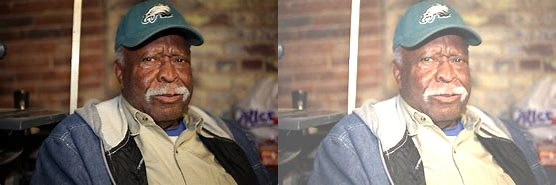

In [10]:
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/pictures.jpeg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
# birghtness_image = cv.convertScaleAbs(original, beta = brightness)

final_frame = cv.hconcat((original,brightness_image))
cv2_imshow(final_frame)

Tugas Praktikum


 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 60
Masukkan nilai kontras: 1.5


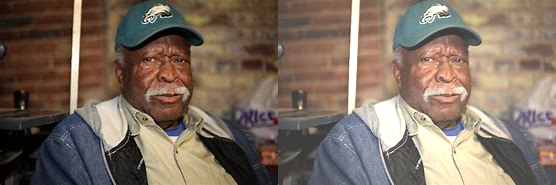

In [13]:
#No 1
print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')

try:
  brightness = float(input('Masukkan nilai kecerahan: '))
  contrast = float(input('Masukkan nilai kontras: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/pictures.jpeg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original,brightness_image))
cv2_imshow(final_frame)

 Mengubah tingkat kecerahan citra dengan transformasi Log 
----------------------------------
Masukkan nilai kecerahan: 40


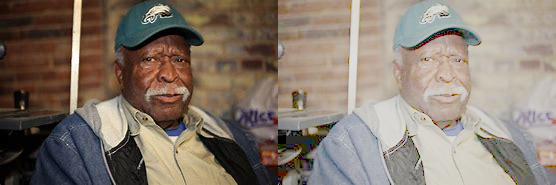

In [14]:
#No 2
print(' Mengubah tingkat kecerahan citra dengan transformasi Log ')
print('----------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/pictures.jpeg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness*(np.log(1+original[y,x,c])),0,255)

final_frame = cv.hconcat((original,brightness_image))
cv2_imshow(final_frame)

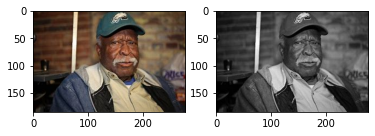

In [16]:
#No 3 (Averaging)

img = cv.imread('/content/drive/MyDrive/pictures.jpeg')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)

img_avg = cv.imread('/content/drive/MyDrive/pictures.jpeg')
img_avg[:] = img.mean(axis = -1, keepdims = 1)

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_avg)


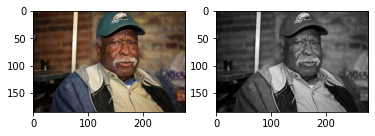

In [17]:
#No 3 (Lightness)
img = cv.imread('/content/drive/MyDrive/pictures.jpeg')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)

img_lgh = cv.imread('/content/drive/MyDrive/pictures.jpeg')
img_lgh[:] = np.max(img_lgh, axis = -1,keepdims = 10)/2+np.min(img_lgh,axis=-1,keepdims=10)/2

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_lgh)

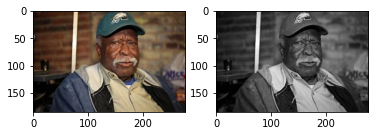

In [19]:
#No 3 Luminance
img = cv.imread('/content/drive/MyDrive/pictures.jpeg')
img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)

image_lmc = cv.imread('/content/drive/MyDrive/pictures.jpeg')
R, G, B = image_lmc[:,:,0], image_lmc[:,:,1], image_lmc[:,:,2]

gray_image_lmc = (0.21*R) + (0.72*G) + (0.07*B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(gray_image_lmc, cmap='gray')

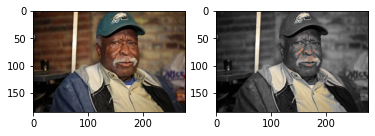

In [24]:
#No 4
img = cv.imread('/content/drive/MyDrive/pictures.jpeg')

ret, mask = cv.threshold(img[:,:,2],180,255,cv.THRESH_BINARY)

mask3 = np.zeros_like(img)
mask3[:,:,0]=mask
mask3[:,:,1]=mask
mask3[:,:,2]=mask

red = cv.bitwise_and(img_rgb, mask3)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(img, 255 - mask3)

out = gray + red
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(out, cmap='gray')